**Note:** most of the code is extracted from [source](https://cameo.bio/05-predict-gene-knockout-strategies.html#optknock).

OptGene is an algorithm that tries to optimize production of a target metabolite an minimize production of undesired by-products by simulating the addition of metabolic pathways (Patil 2005).

# **OptGene**

In [2]:
# This is just importing of the model and some tools to work with the GSM.
import numpy as np
import cobra
import cobra.manipulation.delete 
from cobra.io import read_sbml_model
from cobra.util import create_stoichiometric_matrix
from cobra import Reaction, Metabolite
import pandas as pd
# Read model (central metabolism model of Escherichia coli)
model = read_sbml_model("iML1515.xml")
%run -i scripts/create_pathway.ipynb 

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-20


In [3]:
import cameo
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

In [4]:
plotter = PlotlyPlotter()

In [5]:
# creating the models with the respective pathways

# path_selector legend
# 0 -> no additional reactions
#1 -> nicotinamid pathway  
#2 -> nicotinic acid pathway  
#3 -> nicotinamid riboside pathway

nam_model = create_pathway(model.copy(),1)
na_model = create_pathway(model.copy(),2)
nr_model = create_pathway(model.copy(),3)
models = [model, (nam_model,'NAMPT'),(na_model,'NMN Synthetase'),(nr_model,'DeoD')]
'done'

Read LP format model from file /var/folders/xm/9p7p9cbx5pl_147c9t396fx40000gp/T/tmpjgvo4oxu.lp
Reading time = 0.01 seconds
: 1883 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /var/folders/xm/9p7p9cbx5pl_147c9t396fx40000gp/T/tmpwnchugl4.lp
Reading time = 0.01 seconds
: 1883 rows, 5424 columns, 21150 nonzeros
Read LP format model from file /var/folders/xm/9p7p9cbx5pl_147c9t396fx40000gp/T/tmpnyq6pptn.lp
Reading time = 0.01 seconds
: 1883 rows, 5424 columns, 21150 nonzeros


'done'

In [8]:

#Choosing uptake rates
medium=model.medium
medium['EX_ncam_e'] = 100
medium['EX_nr_e'] = 100
medium["EX_na_e"] = 100
medium["EX_glc__D_e"] = 10

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/ca

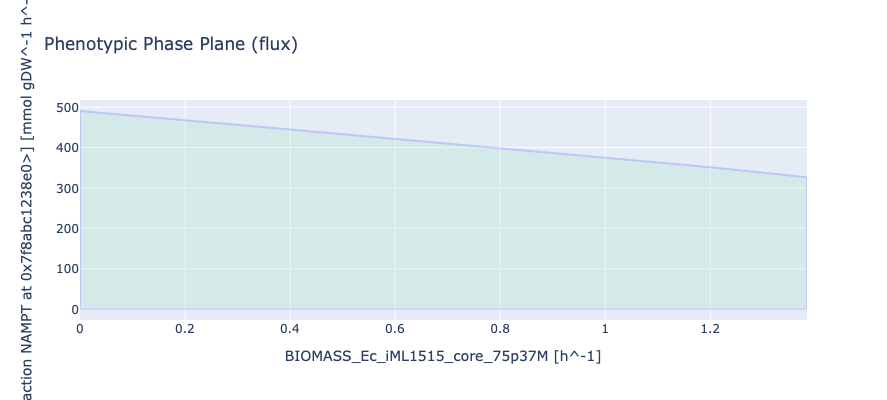

In [10]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA
production_envelope = phenotypic_phase_plane(nam_model,
                                             objective=[nam_model.reactions.NAMPT],
                                             variables=nam_model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
production_envelope.plot(plotter, height=400)

In [11]:
# Load dependencies
import cameo
from cameo.strain_design import OptGene

ImportError: cannot import name 'find_gene_knockout_reactions' from 'cobra.manipulation.delete' (/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/manipulation/delete.py)

In [1]:
# The analysis
optgene = OptGene(model)

result = optgene.run(target=model.reactions.NAMPT,       # What to produce
                     biomass=model.reactions.BIOMASS_Ec_iML1515_core_75p37M, # Initial optimization
                     max_evaluations=20000,
                     population_size=200,
                     max_knockouts=2,
                     plot=False,
                     growth_coupled=True)

NameError: name 'OptGene' is not defined

**Optimization via computational algorithm simulations.**

We have tried to implement several computational algorithm simulations to optimize the production of NMN, and we used OptCouple, OptGene and OptKnockout. OptCouple is an algorithm that combines knock-outs, knock-ins and media additions to couple metabolic flux towards a target metabolite with biomass accumulation, and most of the code was extracted from reference [1]. OptGene[2] is an algorithm that tries to optimize production of a target metabolite an minimize production of undesired by-products by simulating the addition of metabolic pathways, and OptKnock[3] is an algorithm which aims to couple the production of a desired product with biomass accumulation by simulating knockout combinations in a model and comparing resulting flux balances. 

**Discussion**

First of all, none of the used computational tools worked well in our case. OptCouple gave the error of "primal_y_const_NAMPT_lb", which we could not figure how to fix it. For OptGene and OptKnockout, we were able to get the phenotypic phase plane, which plots biomass againsit NMN production through NAMPT reactions. The plot showed that the NMN production went down when more biomass was generated. Nevertheless, the entire simulations were not completed due to that cobra cannot import find_gene_knockout_reactions from cobra.manipulation.delete.  

## References
[1] Jensen, Kristian, et al. "OptCouple: joint simulation of gene knockouts, insertions and medium modifications for prediction of growth-coupled strain designs." Metabolic engineering communications 8 (2019): e00087.

[2] Patil, Kiran Raosaheb, et al. "Evolutionary programming as a platform for in silico metabolic engineering." BMC bioinformatics 6.1 (2005): 1-12.

[3] Burgard, Anthony P., Priti Pharkya, and Costas D. Maranas. "Optknock: a bilevel programming framework for identifying gene knockout strategies for microbial strain optimization." Biotechnology and bioengineering 84.6 (2003): 647-657.